In [1]:
import os, inspect
import matplotlib.pyplot as plt
import numpy as np
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(currentdir))))

In [2]:
%%time
# Import velocity field
import sys
sys.path.append(parentdir+"/code/2D/Gridded/General")
from ipynb.fs.full.import_AVISO import Import_AVISO

#Import velocity data from file in data-folder
x, y, U, V, date_gregorian, time = Import_AVISO(parentdir+r'/data/AVISO_Atlantic.nc')

CPU times: user 24.9 ms, sys: 14 ms, total: 38.9 ms
Wall time: 37.9 ms


In [3]:
X, Y = np.meshgrid(x, y)

In [4]:
# Name of Dataset. {"Ocean", "General"}
Type = "Ocean"

# Number of cores to be used for parallel computing
Ncores = 16

# Specify whether the flow is incompressible. {True, False}
incompressible = True

# Summarize list of parameters of the flow.
params_data = Type, X, Y, time, U, V, Ncores, incompressible

In [5]:
%%time
sys.path.append(parentdir+"/code/2D/Gridded")
from ipynb.fs.full.System import System
DS = System()
DS._init_data(params_data)

CPU times: user 35.2 s, sys: 18.1 ms, total: 35.2 s
Wall time: 35.2 s


In [6]:
%%time

# Initial time (in days)
t0 = 0

# Final time (in days)
tN = 20

# time step-size
dt = .05

time = np.arange(t0, tN+dt, dt)

# longitudinal and latitudinal boundaries (in degrees)
xmin = 335
xmax = 340
ymin = 20
ymax = 25

# spacing of meshgrid (in degrees)
dx = 0.1
dy = 0.1

x_grid = np.arange(xmin, xmax + dx, dx)
y_grid = np.arange(ymin, ymax + dy, dy)

periodic_boundary = False

params_ds = time, x_grid, y_grid, periodic_boundary
DS._init_ds(params_ds)

CPU times: user 219 µs, sys: 49 µs, total: 268 µs
Wall time: 253 µs


In [7]:
%%time
DS._Interpolation_velocity()

CPU times: user 1.3 s, sys: 818 ms, total: 2.12 s
Wall time: 255 ms


In [8]:
FTLE = DS._FTLE_()

=================Trajectories over meshgrid=================


  0%|          | 0/52 [00:00<?, ?it/s]

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   41.7s


=================gradF w/ auxiliary grid=================
=================Left and right Cauchy-Green-Strain tensors=================
=================FTLE=================


[Parallel(n_jobs=16)]: Done  52 out of  52 | elapsed:  1.3min finished


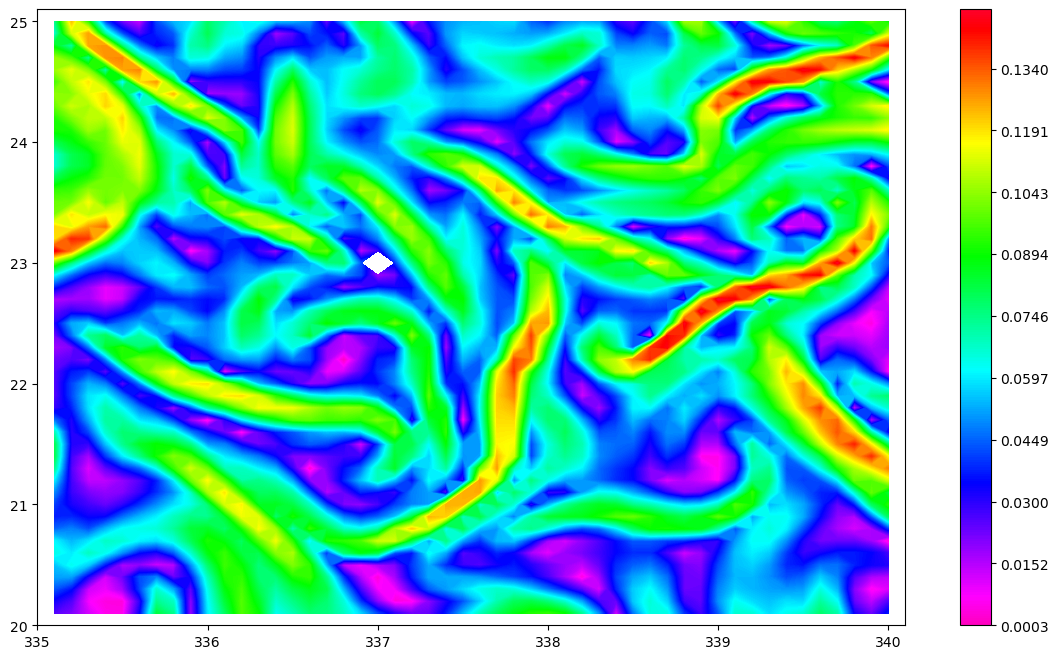

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 8))
plt.contourf(DS.X_domain, DS.Y_domain, FTLE[:,:,0], levels = 1000, cmap = "gist_rainbow_r")
plt.colorbar()
plt.show()

In [10]:
PRA = DS._PRA_()
fig = plt.figure(figsize = (14, 8))
plt.contourf(DS.X_domain, DS.Y_domain, PRA, levels = 1000, cmap = "gist_rainbow_r")
plt.colorbar()
plt.show()

=================PRA=================


NameError: name 'np' is not defined